In [116]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from class_names import classNames

In [117]:
DATA_DIR = "data"

train_link = os.path.join(DATA_DIR, "train.p")
valid_link = os.path.join(DATA_DIR, "valid.p")
test_link = os.path.join(DATA_DIR, "test.p")

In [118]:
import pickle

with open (train_link, "rb") as f:
    train = pickle.load(f)

with open (valid_link, "rb") as f:
    valid = pickle.load(f)

with open (test_link, "rb") as f:
    test = pickle.load(f)

In [119]:
X_train = train["features"]
X_test = test["features"]
X_valid = valid["features"]
y_train = train["labels"]
y_test = test["labels"]
y_valid = valid["labels"]
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,)
(4410, 32, 32, 3) (4410,)
(12630, 32, 32, 3) (12630,)


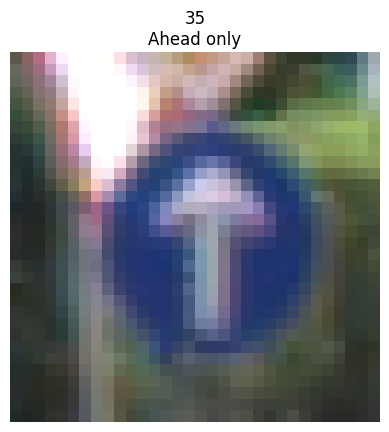

In [187]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
plt.imshow(X_train[0])
plt.title(f"{y_train[0]}\n{classNames[y_train[0]]}")
plt.axis('off')
plt.show()

In [6]:
X_train = X_train.astype("float") / 255.0
X_valid = X_valid.astype("float") / 255.0
X_test = X_test.astype("float") / 255.0

In [7]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_valid = lb.fit_transform(y_valid)
classes = 43
print(valid["labels"][0])
print(classNames[valid['labels'][0]])
print(y_valid[0])

41
End of no passing
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0]


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

# ***Model based on VGG16***
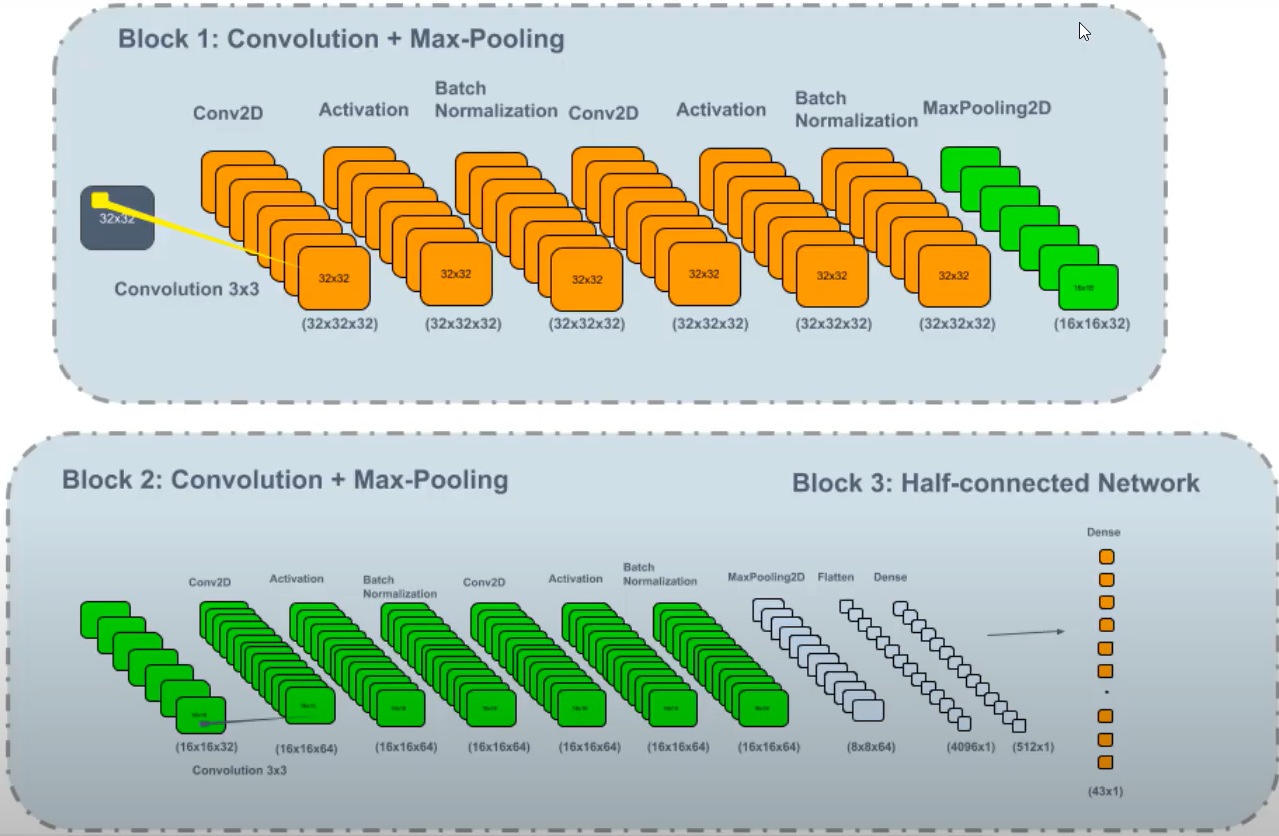

In [9]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape = (32,32,3), activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(classes, activation='softmax')
])

model.summary()

c:\WorkSpace\XLA\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,188,107 (8.35 MB)

 Trainable params: 2,186,699 (8.34 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [10]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ["accuracy"])

In [11]:
print("Start Training")
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Start Training
Epoch 1/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 47s 182ms/step - accuracy: 0.7835 - loss: 0.8697 - val_accuracy: 0.3477 - val_loss: 2.7004
Epoch 2/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 52s 212ms/step - accuracy: 0.9982 - loss: 0.0129 - val_accuracy: 0.9552 - val_loss: 0.1703
Epoch 3/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 79s 200ms/step - accuracy: 0.9994 - loss: 0.0045 - val_accuracy: 0.9937 - val_loss: 0.0228
Epoch 4/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 46s 187ms/step - accuracy: 0.9998 - loss: 0.0021 - val_accuracy: 0.9980 - val_loss: 0.0098
Epoch 5/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 48s 196ms/step - accuracy: 1.0000 - loss: 4.0009e-04 - val_accuracy: 0.9977 - val_loss: 0.0090


In [12]:
MODEL_DIR = "model"
os.makedirs(MODEL_DIR, exist_ok=True)

model.save(os.path.join(MODEL_DIR, "model_CNN.h5"))

In [13]:
saved_model = tf.keras.models.load_model(os.path.join(MODEL_DIR,"model_CNN.h5"))

In [14]:
y_pred = saved_model.predict(X_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


In [15]:
y_pred = y_pred.argmax(axis=1, keepdims=True)
y_test = y_test.reshape(-1,1)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1‑score:  {f1:.4f}")


Accuracy:  0.9605
Precision: 0.9618
Recall:    0.9605
F1‑score:  0.9601


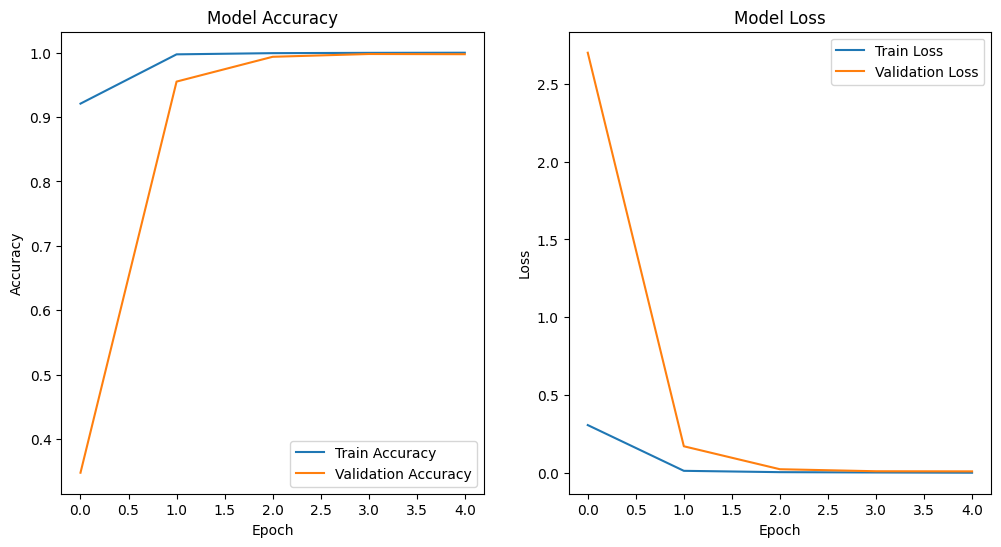

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

C:\Users\TUng lo gach.DESKTOP-S5MJD9E\AppData\Local\Temp\ipykernel_12920\420722440.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f'Pred: {classNames[int(pred_label)]}\n'


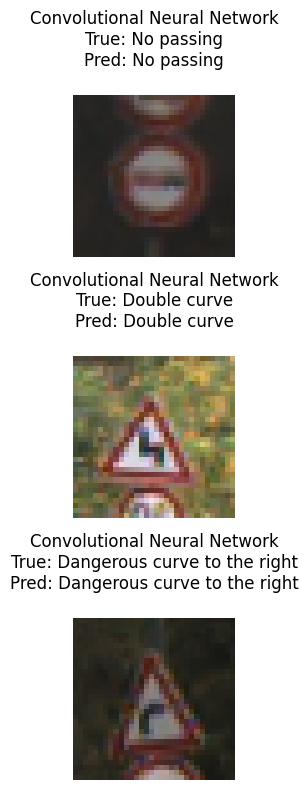

In [48]:
plt.figure(figsize=(12, 8))
x = 15
for i in range(x, 3+x):
    plt.subplot(3, 1, i + 1 -x)
    
    pred_label = y_pred[i]
    true_label = y_test[i]

    img = X_test[i]
    plt.imshow(img)
    plt.title(
        "Convolutional Neural Network\n"
        f'True: {classNames[int(true_label)]}\n'
        f'Pred: {classNames[int(pred_label)]}\n'
    )
    plt.axis('off')

plt.tight_layout()
plt.show()